In [1]:
import mlgrad.mlocation_scatter as mls
import mlgrad.avragg as avragg
import mlgrad.distance as distance
import mlgrad.func as func
import mlgrad.loss as loss
import mlgrad.model as model
import mlgrad.weights as weights

from mlgrad import erm_fg, erm_sg, erm_irgd, fg, fg_rud, sg, weights, averager_it, erisk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import rcsetup
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

# rcsetup.defaultParams['font.size'][0] = 12
# rcsetup.defaultParams
# plt.style.available

In [2]:
names = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 
         'p8', 'p9', 'p10', 'p11', 'p12', 'p13']
df = pd.read_csv('data/wine.data', names=['cls'] + names)
print(len(df))

178


In [3]:
Xs = []
for i in range(1,4):
    _df = df[df['cls'] == i]
    _X = np.c_[tuple(_df[n].values for n in names)]
    Xs.append(_X)
del _X, _df

XX = np.c_[tuple(df[n].values for n in names)]
Y = df['cls'].values

In [4]:
# avg = avragg.MWAverage(averager_it(func.QuantileFunc(0.9, func.Sqrt(0.001))))
# mlse = mls.MLocationScatterEstimator(avg, n_iter=100, h=0.02)
# mlse.fit(X1)

In [5]:
# print(mlse.dvals)
# plt.plot(mlse.dvals)
# plt.show()

In [6]:
# loc1, S1 = mlse.loc, mlse.S
# distfunc = mlse.distfunc

In [7]:
# loc, S = mlse.loc.base, mlse.S.base
# distfunc = mlse.distfunc

# loc0 = mls.standard_location(X1)
# S0 = mls.standard_covariance(X1, loc0)
# mls.scale_matrix(S0)
# distfunc0 = distance.MahalanobisDistance(np.linalg.inv(S0))
# print(loc0)
# print(loc)

In [8]:
# distfunc = distance.MahalanobisDistance(np.linalg.inv(S))
# distfunc0 = distance.MahalanobisDistance(np.linalg.inv(S0))

# D0 = np.array([distfunc0(x, loc0) for x in X1])
# D = np.array([distfunc(x, loc) for x in X1])
# D0_s = D0.reshape(-1,1)

In [9]:
# linmod2 = model.LinearModel(np.array([0., 1.]))
# loss2 = loss.ErrorLoss(func.Square())
# avg2 = avragg.MWAverage(averager_it(func.QuantileFunc(0.8, func.Sqrt(0.001))))
# er2 = erisk(D0_s, D, linmod2, loss2)
# fg2 = fg(er2)
# wg2 = weights.MWeights(avg2, er2)
# irgd2 = erm_irgd(fg2, wg2)

In [10]:
# plt.figure(figsize=(10.0, 4.0))
# plt.subplot(1,2,1)
# plt.scatter(D0, D, c='w', edgecolors='k', linewidth=1)
# X0 = np.array([[0.], [6.]])
# plt.plot(X0, linmod2.evaluate_all(X0), c='k', linewidth=1.5, linestyle='--')
# plt.xlabel('Классическое расстояние')
# plt.ylabel('Робастное расстояние')
# plt.title('WINE [class=3]')
# # plt.ylim(0,10)
# plt.subplot(1,2,2)
# plt.bar(range(len(D)), np.sort(np.abs(D - linmod2.evaluate_all(D0_s))))
# plt.savefig('fig/robust_clustering_elipse_wine_3.eps')
# plt.show()

In [11]:
# plt.scatter(D10, D1, linewidth=1, label='1')
# plt.scatter(D20, D2, linewidth=1, label='2')
# plt.scatter(D30, D3, linewidth=1, label='3')
# plt.ylim(0,4)
# plt.legend()

In [49]:
def find_class_center(cls):
    df1 = df[df['cls'] == cls]
    X1 = np.c_[tuple(df1[n].values for n in names)]
    print(len(X1))
    avg = avragg.MWAverage(averager_it(func.QuantileFunc(0.9, func.Sqrt(0.001))))
#     avg = averager_it(func.QuantileFunc(0.9, func.Sqrt(0.001)))
    mlse = mls.MLocationScatterEstimator(avg, n_iter=500, n_step=50, h=0.1)
    mlse.fit(X1)
    
    loc0 = mls.standard_location(X1)
    S0 = mls.standard_covariance(X1, loc0)
    mls.scale_matrix(S0)
    distfunc0 = distance.MahalanobisDistance(np.linalg.inv(S0))
    
    print('class ', cls)
    return mlse.loc.base, mlse.S.base, mlse.distfunc, loc0, S0, distfunc0


In [50]:
%time loc1, S1, distfunc1, loc10, S10, distfunc10 = find_class_center(1)

59
class  1
CPU times: user 1.63 s, sys: 47.9 ms, total: 1.68 s
Wall time: 424 ms


In [51]:
%time loc2, S2, distfunc2, loc20, S20, distfunc20 = find_class_center(2)

71
class  2
CPU times: user 1.58 s, sys: 47.9 ms, total: 1.63 s
Wall time: 405 ms


In [52]:
%time loc3, S3, distfunc3, loc30, S30, distfunc30 = find_class_center(3)

48
class  3
CPU times: user 445 ms, sys: 19.7 ms, total: 465 ms
Wall time: 118 ms


In [53]:
with np.printoptions(precision=1, suppress=True, linewidth=120):
    print(distfunc1.S.base,"\n",distfunc2.S.base,"\n",distfunc3.S.base)
    
# np.set_printoptions()

<MemoryView of 'ndarray' object> 
 <MemoryView of 'ndarray' object> 
 <MemoryView of 'ndarray' object>


In [54]:
locs = [loc1, loc2, loc3]
locs0 = [loc10, loc20, loc30]
distfuncs = [distfunc1, distfunc2, distfunc3]
distfuncs0 = [distfunc10, distfunc20, distfunc30]

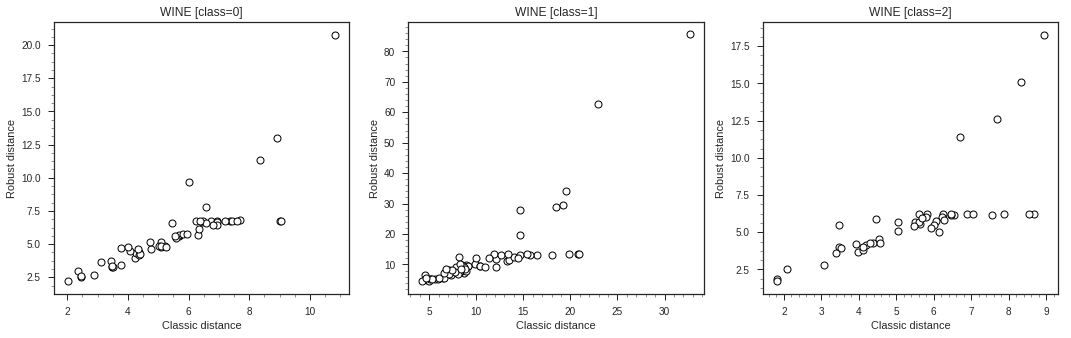

In [55]:
plt.figure(figsize=(18.0, 5.0))
for i in range(3):
    plt.subplot(1,3,i+1)
    _distfunc = distfuncs[i]
    _distfunc0 = distfuncs0[i]
    _loc = locs[i]
    _loc0 = locs0[i]
    _D0 = np.array([_distfunc0(x, _loc0) for x in Xs[i]])
    _D  = np.array([_distfunc(x, _loc) for x in Xs[i]])
    _D1 = np.sort(_D)
    _D0_s = _D0.reshape(-1,1)
    plt.scatter(_D0, _D, c='w', edgecolors='k', linewidth=1)
    plt.xlabel('Classic distance')
    plt.ylabel('Robust distance')
    plt.minorticks_on()
    plt.title('WINE [class=%s]' % i)
plt.savefig('fig/robust_location_scatter_wine.eps')

del _distfunc, _distfunc0, _loc, _loc0, _D0, _D, _D1, _D0_s
plt.show()

In [56]:
ds = [15, 14, 30.]
d1, d2, d3 = ds

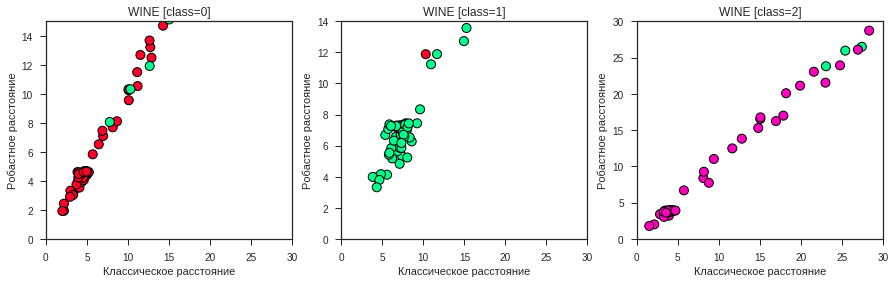

In [20]:
plt.figure(figsize=(15.0, 4.0))
for i in range(3):
    plt.subplot(1,3,i+1)
    _distfunc = distfuncs[i]
    _distfunc0 = distfuncs[i]
    _loc = locs[i]
    _loc0 = locs0[i]
    _D0 = np.array([_distfunc0(x, _loc0) for x in XX])
    _D  = np.array([_distfunc(x, _loc) for x in XX])
    _D0_s = _D0.reshape(-1,1)
    _sc = plt.scatter(_D0, _D, c=Y, edgecolors='k', s=81, linewidth=1, cmap=plt.cm.gist_rainbow)
#     plt.colorbar(_sc)
    plt.xlabel('Классическое расстояние')
    plt.ylabel('Робастное расстояние')
    plt.title('WINE [class=%s]' % i)
    plt.ylim(0, ds[i])
    plt.xlim(0,30)
plt.savefig('fig/robust_clustering_ellipse_wine_all_classes.eps')
    
    
plt.show()

In [21]:
def classify(Xk):
    dk1 = distfunc1(Xk, loc1) 
    dk2 = distfunc2(Xk, loc2)     
    dk3 = distfunc3(Xk, loc3)
    if dk1 <= d1:
        return 1
    elif dk3 <= d3:
        return 3
    elif dk2 <= d2:
        return 2
    else:
        return 0

In [22]:
YY = np.array([classify(Xk) for Xk in XX])

In [23]:
print(Y)
print(YY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 3 0 0 2 2 1 0 2 0 0 3 0 2 0
 0 2 2 2 0 2 2 1 2 0 2 1 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 0 3 2 2 0 0 0 0 2 2 2 2 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [24]:
100*sum(YY==0)/147

17.687074829931973